# Datos

In [ ]:
#!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
#!tar xvzf /content/aclImdb_v1.tar.gz

In [4]:
import os
import numpy as np
import pandas as pd

# NEGATIVAS
dir_neg_train = "aclImdb_v1/train/neg"
neg_reviews = []

for f in os.listdir(dir_neg_train):
  with open(f"{dir_neg_train}/{f}",encoding = 'UTF-8') as neg:
    neg_reviews.append(neg.read())

dir_neg_test = "aclImdb_v1/test/neg"
for f in os.listdir(dir_neg_test):
  with open(f"{dir_neg_test}/{f}", encoding = 'UTF-8') as neg:
    neg_reviews.append(neg.read())

# POSITIVAS
dir_pos_train = "aclImdb_v1/train/pos"
pos_reviews = []

for f in os.listdir(dir_pos_train):
  with open(f"{dir_pos_train}/{f}", encoding = 'UTF-8') as pos:
    pos_reviews.append(pos.read())

dir_pos_test = "aclImdb_v1/test/pos"
for f in os.listdir(dir_pos_test):
  with open(f"{dir_pos_test}/{f}", encoding = 'UTF-8') as pos:
    pos_reviews.append(pos.read())

# Pandas DF

pos_df = pd.DataFrame(pos_reviews, columns=["REVIEW"])
pos_df["TARGET"] = "POS"
neg_df = pd.DataFrame(neg_reviews, columns=["REVIEW"])
neg_df["TARGET"] = "NEG"

df = pd.concat([pos_df, neg_df], axis="rows")

df = df[df["REVIEW"].apply(len) <= 512].head(500)
df.head()

,REVIEW,TARGET
11,I liked the film. Some of the action scenes we...,POS
36,I loved this movie since I was 7 and I saw it ...,POS
48,This movie re-wrote film history in every way....,POS
58,It's heart-warming to see a movie that doesn't...,POS
74,This is how movies are supposed to be made: a ...,POS


In [5]:
df.sample(20)

,REVIEW,TARGET
3177,A funny comedy from beginning to end! There ar...,POS
436,Let's cut a long story short. I loved every mi...,POS
3198,"This movie is so cheap, it's endearing!!! With...",POS
1467,Well when watching this film late one night I ...,POS
2746,The little girl Desi is so adorable... I cant ...,POS
2587,"Before viewing, please make sure you have seen...",POS
3910,<br /><br />One of the best films I've ever se...,POS
3442,"""Antwone Fisher"" tells of a young black U.S. N...",POS
2682,Renny Harlin's first American film was one of ...,POS
1831,"What an absolutely stunning movie, if you have...",POS


# Instalamos librerías

In [7]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install sentence_transformers


Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install sentencepiece

   ---------------------------------------- 0.0/991.5 kB ? eta -:--:--
   ---------------------------------------- 10.2/991.5 kB ? eta -:--:--
   - ------------------------------------- 41.0/991.5 kB 653.6 kB/s eta 0:00:02
   ------- -------------------------------- 194.6/991.5 kB 1.7 MB/s eta 0:00:01
   ---------------------------- ----------- 706.6/991.5 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 991.5/991.5 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install keybert


Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install bertopic

  Using cached bertopic-0.16.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached hdbscan-0.8.33.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached umap_learn-0.5.5-py3-none-any.whl
  Using cached plotly-5.19.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
  Using cached numba-0.59.0-cp311-cp311-win_amd64.whl.metadata (2.8 kB)
  Using cached pynndescent-0.5.11-py3-none-any.whl.metadata (6.8 kB)
  Using cached llvmlite-0.42.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
Using cached bertopic-0.16.0-py2.py3-none-any.whl (154 kB)
Using cached plotly-5.19.0-py3-no

  error: subprocess-exited-with-error
  
  × Building wheel for hdbscan (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [40 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\hdbscan
      copying hdbscan\flat.py -> build\lib.win-amd64-cpython-311\hdbscan
      copying hdbscan\hdbscan_.py -> build\lib.win-amd64-cpython-311\hdbscan
      copying hdbscan\plots.py -> build\lib.win-amd64-cpython-311\hdbscan
      copying hdbscan\prediction.py -> build\lib.win-amd64-cpython-311\hdbscan
      copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-cpython-311\hdbscan
      copying hdbscan\validity.py -> build\lib.win-amd64-cpython-311\hdbscan
      copying hdbscan\__init__.py -> build\lib.win-amd64-cpython-311\hdbscan
      creating build\lib.win-amd64-cpython-311\hdbscan\tests
      copying hdbscan\tests\test_flat.py

Cuando termine de correr esta celda, apretar el botón que aparece para reiniciar el entorno.

# Hugging face

https://huggingface.co/


Ejemplo: Traducir texto de inglés a español.

https://huggingface.co/Helsinki-NLP/opus-mt-en-es?text=My+name+is+Sarah+and+I+live+in+London

In [1]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
  
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-es")

model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-es")

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

c:\Users\admin\Desktop\Icaro\Codigo\Resumen\.venv\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\admin\.cache\huggingface\hub\models--Helsinki-NLP--opus-mt-en-es. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

c:\Users\admin\Desktop\Icaro\Codigo\Resumen\.venv\Lib\site-packages\transformers\models\marian\tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [2]:
def translate(x: str) -> str:
    inputs = tokenizer.encode(x, return_tensors='pt')
    outputs = model.generate(inputs)
    return tokenizer.decode(outputs[0])

In [6]:
%%time
translated = df["REVIEW"].head().apply(translate)

for t in translated:
  print(t)

<pad> Me gustó la película. Algunas de las escenas de acción eran muy interesantes, tensas y bien hechas. Me gustó especialmente la escena de apertura que tenía un semi camión en ella. Una escena de acción muy tensa que parecía bien hecho.<br /<unk> br />Algunas de las escenas de transición fueron filmadas de maneras interesantes como la fotografía de lapso de tiempo, colores inusuales, o ángulos interesantes.También la película es divertida son varias partes. También me gustó cómo el tipo malvado fue retratado también. Le daría a la película un 8 de 10.</s>
<pad> Me encantó esta película desde que tenía 7 años y la vi en el día de apertura. Fue tan conmovedor y hermoso. Recomiendo encarecidamente ver para todos. Es una película para ver con tu familia de lejos.<br /<unk> br />Mi puntuación MPAA: PG-13 para elementos temáticos, escenas prolongadas de desasosiego, desnudez/sexualidad y algo de lenguaje.</s>
<pad> Esta película re-escribió la historia de la película en todos los sentidos

# KeyBERT



In [7]:
from keybert import KeyBERT

kw_model = KeyBERT()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\admin\Desktop\Icaro\Codigo\Resumen\.venv\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\admin\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [10]:
# Crear un modelo KeyBERT
kw_model = KeyBERT()

# Texto del cual queremos extraer palabras clave
text = """
         Automatic summarization is the process of shortening a set of data computationally,
         to create a subset (a summary) that represents the most important or relevant
         information within the original content.
       """

# Obtener palabras clave
keywords = kw_model.extract_keywords(text,top_n=3)

# Imprimir palabras clave
print(keywords)

[('summarization', 0.698), ('summary', 0.3783), ('automatic', 0.281)]


In [13]:
from keybert import KeyBERT

text = "The quick brown fox jumps over the lazy dog"

kw_model = KeyBERT()

# (1, 1) unigramas
keywords_unigrams = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words=None)

# (1, 2) unigramas y bigramas
keywords_uni_bi_grams = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words=None)

# (2, 2) solo bigramas
keywords_bigrams = kw_model.extract_keywords(text, keyphrase_ngram_range=(2,2), stop_words=None)

print("Unigramas:")
print(keywords_unigrams)
print("\nUnigramas y bigramas:")
print(keywords_uni_bi_grams)
print("\nBigramas:")
print(keywords_bigrams)

Unigramas:
[('fox', 0.5183), ('dog', 0.3931), ('jumps', 0.3856), ('lazy', 0.345), ('brown', 0.2869)]

Unigramas y bigramas:
[('fox jumps', 0.6964), ('brown fox', 0.624), ('lazy dog', 0.5938), ('fox', 0.5183), ('quick brown', 0.4221)]

Bigramas:
[('fox jumps', 0.6964), ('brown fox', 0.624), ('lazy dog', 0.5938), ('quick brown', 0.4221), ('the quick', 0.4122)]


- Top n: Cantidad de keywords por review
- keyphrase_ngram_range: Cantidad de palabras por keyword (keyphrase)

In [14]:
%%time
df["KEYWORDS"] = df.REVIEW.apply(lambda x: kw_model.extract_keywords(x, top_n=3, keyphrase_ngram_range=(1,1)))

CPU times: total: 2min 3s
Wall time: 15.3 s


In [15]:
pd.set_option("display.max_colwidth", None)

In [16]:
df.head()

,REVIEW,TARGET,KEYWORDS
11,"I liked the film. Some of the action scenes were very interesting, tense and well done. I especially liked the opening scene which had a semi truck in it. A very tense action scene that seemed well done.<br /><br />Some of the transitional scenes were filmed in interesting ways such as time lapse photography, unusual colors, or interesting angles. Also the film is funny is several parts. I also liked how the evil guy was portrayed too. I'd give the film an 8 out of 10.",POS,"[(portrayed, 0.3491), (liked, 0.3331), (film, 0.3248)]"
36,"I loved this movie since I was 7 and I saw it on the opening day. It was so touching and beautiful. I strongly recommend seeing for all. It's a movie to watch with your family by far.<br /><br />My MPAA rating: PG-13 for thematic elements, prolonged scenes of disastor, nudity/sexuality and some language.",POS,"[(movie, 0.3356), (13, 0.3104), (recommend, 0.2737)]"
48,"This movie re-wrote film history in every way. No one cares what anyone thinks about this movie, because it transcends criticism. Every flaw in the movie is easily overcome by the many amazing things the movie has going for it. It is an extremely beautiful movie, and I doubt many of us will see anything like it again. I've seen it more times than I care to count, and I still become transfixed every time, with a feeling which is hard to describe. One for the ages.",POS,"[(movie, 0.3384), (film, 0.3341), (criticism, 0.2349)]"
58,"It's heart-warming to see a movie that doesn't bash males. In this one the wife/mother leaves her family to ""get in touch"" with herself - or pursue her libido. The father stays with and nurtures the kids, letting neither his work nor his love life interfere with his love of and responsibility to them.",POS,"[(father, 0.3556), (libido, 0.3483), (family, 0.3428)]"
74,This is how movies are supposed to be made: a fascinating setting; characters about whom you come to care deeply; writing and editing that move the plot efficiently and build suspense. This is a wonderful film -- deeply moving without being sentimental. Highly recommended.,POS,"[(film, 0.4707), (suspense, 0.4584), (movies, 0.4442)]"


Podemos ver que además de la keyword, nos trae un score para cada keyword.

Vamos a eliminar el score y quedarnos únicamente con las kw:

In [17]:
df["KEYWORDS"] = df.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

In [18]:
df.head()

,REVIEW,TARGET,KEYWORDS
11,"I liked the film. Some of the action scenes were very interesting, tense and well done. I especially liked the opening scene which had a semi truck in it. A very tense action scene that seemed well done.<br /><br />Some of the transitional scenes were filmed in interesting ways such as time lapse photography, unusual colors, or interesting angles. Also the film is funny is several parts. I also liked how the evil guy was portrayed too. I'd give the film an 8 out of 10.",POS,"[portrayed, liked, film]"
36,"I loved this movie since I was 7 and I saw it on the opening day. It was so touching and beautiful. I strongly recommend seeing for all. It's a movie to watch with your family by far.<br /><br />My MPAA rating: PG-13 for thematic elements, prolonged scenes of disastor, nudity/sexuality and some language.",POS,"[movie, 13, recommend]"
48,"This movie re-wrote film history in every way. No one cares what anyone thinks about this movie, because it transcends criticism. Every flaw in the movie is easily overcome by the many amazing things the movie has going for it. It is an extremely beautiful movie, and I doubt many of us will see anything like it again. I've seen it more times than I care to count, and I still become transfixed every time, with a feeling which is hard to describe. One for the ages.",POS,"[movie, film, criticism]"
58,"It's heart-warming to see a movie that doesn't bash males. In this one the wife/mother leaves her family to ""get in touch"" with herself - or pursue her libido. The father stays with and nurtures the kids, letting neither his work nor his love life interfere with his love of and responsibility to them.",POS,"[father, libido, family]"
74,This is how movies are supposed to be made: a fascinating setting; characters about whom you come to care deeply; writing and editing that move the plot efficiently and build suspense. This is a wonderful film -- deeply moving without being sentimental. Highly recommended.,POS,"[film, suspense, movies]"


Si luego vamos a hacer algún análisis de estas keywords, seguramente sea una buena opción lemmatizarlas:

In [22]:
import spacy
nlp = spacy.load('en_core_web_sm')

def lemma(review:str) -> str:
    """
    Lemmatize using spacy.
    """
    
    doc = nlp(review)
    lemma_review = []
    for token in doc:
        lemma_review.append(token.lemma_)
        
    return " ".join(lemma_review)

In [23]:
df["KEYWORDS"] = df["KEYWORDS"].apply(lambda kw: [lemma(k) for k in kw])

In [24]:
df.head()

,REVIEW,TARGET,KEYWORDS
11,"I liked the film. Some of the action scenes were very interesting, tense and well done. I especially liked the opening scene which had a semi truck in it. A very tense action scene that seemed well done.<br /><br />Some of the transitional scenes were filmed in interesting ways such as time lapse photography, unusual colors, or interesting angles. Also the film is funny is several parts. I also liked how the evil guy was portrayed too. I'd give the film an 8 out of 10.",POS,"[portray, like, film]"
36,"I loved this movie since I was 7 and I saw it on the opening day. It was so touching and beautiful. I strongly recommend seeing for all. It's a movie to watch with your family by far.<br /><br />My MPAA rating: PG-13 for thematic elements, prolonged scenes of disastor, nudity/sexuality and some language.",POS,"[movie, 13, recommend]"
48,"This movie re-wrote film history in every way. No one cares what anyone thinks about this movie, because it transcends criticism. Every flaw in the movie is easily overcome by the many amazing things the movie has going for it. It is an extremely beautiful movie, and I doubt many of us will see anything like it again. I've seen it more times than I care to count, and I still become transfixed every time, with a feeling which is hard to describe. One for the ages.",POS,"[movie, film, criticism]"
58,"It's heart-warming to see a movie that doesn't bash males. In this one the wife/mother leaves her family to ""get in touch"" with herself - or pursue her libido. The father stays with and nurtures the kids, letting neither his work nor his love life interfere with his love of and responsibility to them.",POS,"[father, libido, family]"
74,This is how movies are supposed to be made: a fascinating setting; characters about whom you come to care deeply; writing and editing that move the plot efficiently and build suspense. This is a wonderful film -- deeply moving without being sentimental. Highly recommended.,POS,"[film, suspense, movie]"


Ahora podemos ver la popularidad de las keywords:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))
sns.countplot(x=df.explode("KEYWORDS").KEYWORDS, 
              order=df.explode("KEYWORDS").KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title("KEYWORDS popularity - TOP 30")
plt.xticks(rotation=45)
plt.show()

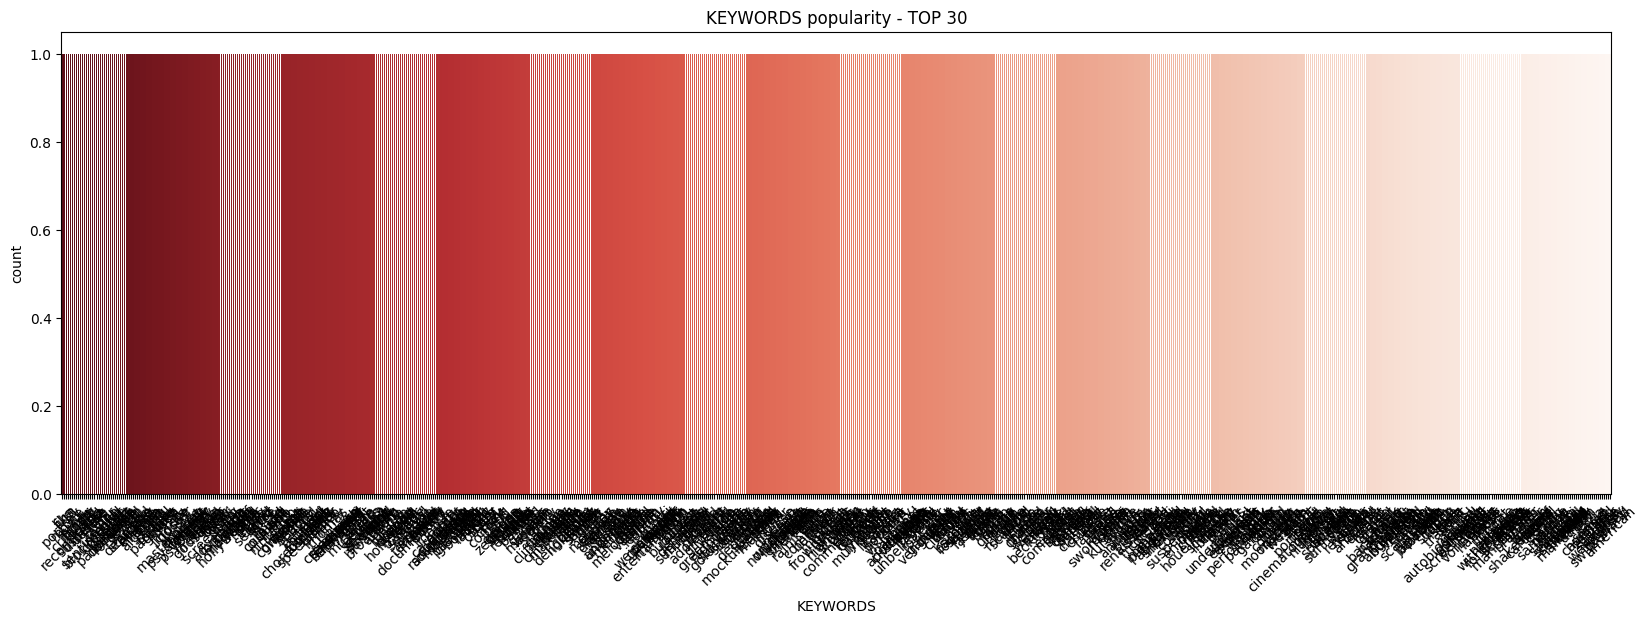

In [29]:
plt.figure(figsize=(20,6))
sns.countplot(x=df["KEYWORDS"].explode().drop_duplicates(), palette='Reds_r')
plt.title("KEYWORDS popularity - TOP 30")
plt.xticks(rotation=45)
plt.show()

# BERTopic

Ahora utilizaremos BERTopic para extraer tópicos.

In [50]:
from bertopic import BERTopic

In [51]:
%%time
topic_model = BERTopic(calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df["REVIEW"].values)

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2021-11-10 13:34:14,404 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2021-11-10 13:34:23,720 - BERTopic - Reduced dimensionality with UMAP
2021-11-10 13:34:23,775 - BERTopic - Clustered UMAP embeddings with HDBSCAN


CPU times: user 1min 21s, sys: 1.46 s, total: 1min 23s
Wall time: 1min 24s


In [52]:
topics_data = topic_model.get_topic_info()
topics_data

,Topic,Count,Name
0,-1,227,-1_and_of_it_movie
1,0,47,0_it_this_movie_and
2,1,43,1_it_is_film_movie
3,2,42,2_of_to_film_horror
4,3,39,3_was_it_and_is
5,4,30,4_in_this_is_it
6,5,28,5_it_disney_movie_kids
7,6,26,6_her_is_she_film
8,7,18,7_in_to_film_movie


El topico -1 corresponde a outliers.

In [53]:
df["TOPIC_ID"] = topics
df = df.merge(topics_data, left_on="TOPIC_ID", right_on="Topic", how="left")
df = df.rename(columns={"Name": "TOPIC_NAME", "Count": "TOPIC_POPULARITY"})
df = df.drop(["Topic"], axis=1)
df.head(3)

,REVIEW,TARGET,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME
0,"Renny Harlin's first American film was one of the best of a slew of prison-set horror films(like ""Death House"" or ""The Chair"")in the late 80's.Twenty years before,guard Lane Smith had wrongfully executed a condemned man.Now,he is the warden of the newly re-opened prison,and the man's ghost is back for bloody revenge.This atmospheric and very moody film features lots of gruesome gore and violence.Viggo Mortensen,Tiny Lister,Tom Everett and Kane Hodder are onhand for the entertaining carnage.",POS,"[ghost, renny, harlin]",2,42,2_of_to_film_horror
1,"Very possibly one of the funniest movies in the world. Oscar material. Trey Parker and Matt Stone are hilarious and before you see this I suggest you see ""South Park"" one of the funniest cartoons created. Buy it, you will laugh every time you see it. Pure stroke of genius. If you don't think its funny then you have no soul or sense of humor. 10 out of 10.",POS,"[cartoon, oscar, park]",0,47,0_it_this_movie_and
2,Excellent film. Suzy Kendall will hold your interest throughout. Has not been shown on American TV for a decade. One scene that has always stayed with me is the German cavalry gas attack. You will find others. Hope they soon put it on tape.,POS,"[film, scene, cavalry]",1,43,1_it_is_film_movie


In [ ]:
topic_model.visualize_topics()

Keywords más frecuentes en cada tópico

In [57]:
topic_keywords = df.explode("KEYWORDS").groupby(["TOPIC_ID"]).agg({"KEYWORDS": pd.Series.mode})
topic_keywords = topic_keywords.rename(columns={"KEYWORDS": "TOPIC_MOST_FREQ_KEYWORD"})
df = df.merge(topic_keywords, how='left', on="TOPIC_ID")
df.head()

,REVIEW,TARGET,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,TOPIC_MOST_FREQ_KEYWORD
0,"Renny Harlin's first American film was one of the best of a slew of prison-set horror films(like ""Death House"" or ""The Chair"")in the late 80's.Twenty years before,guard Lane Smith had wrongfully executed a condemned man.Now,he is the warden of the newly re-opened prison,and the man's ghost is back for bloody revenge.This atmospheric and very moody film features lots of gruesome gore and violence.Viggo Mortensen,Tiny Lister,Tom Everett and Kane Hodder are onhand for the entertaining carnage.",POS,"[ghost, renny, harlin]",2,42,2_of_to_film_horror,film
1,"Very possibly one of the funniest movies in the world. Oscar material. Trey Parker and Matt Stone are hilarious and before you see this I suggest you see ""South Park"" one of the funniest cartoons created. Buy it, you will laugh every time you see it. Pure stroke of genius. If you don't think its funny then you have no soul or sense of humor. 10 out of 10.",POS,"[cartoon, oscar, park]",0,47,0_it_this_movie_and,movie
2,Excellent film. Suzy Kendall will hold your interest throughout. Has not been shown on American TV for a decade. One scene that has always stayed with me is the German cavalry gas attack. You will find others. Hope they soon put it on tape.,POS,"[film, scene, cavalry]",1,43,1_it_is_film_movie,movie
3,Not a bad martial arts film. Fight scenes were good. Michel Qissi did a good job directing his first film without Van Damme. Story worked without foul language and too much blood. Screenwriter Jeanette Francessca has a good line to the story that works. IT would be great to see something else from her in the same genre. She likes the art and having strong women promenant. IT was definitely worth watching. I recommend the film to all drama and martial arts lovers.,POS,"[martial, film, screenwriter]",-1,227,-1_and_of_it_movie,movie
4,"This movie is rich with action and gore. The story line is strong enough to support the action sequences. The English version needs a tad bit of help in the dubbing department but it was still enjoyable. This movie ranks among my personal favorites next to ""Hard Boiled"" ...",POS,"[movie, dub, action]",2,42,2_of_to_film_horror,film


Además, podríamos obtener sentimiento de cada review y luego asociar tópicos a sentimientos o keywor